# This notebook uses sentinel 2 cog for processing and visualizing
Install the required libraries: intack-stac, satsearch

In [ ]:
#pip install git+https://github.com/intake/intake-stac

Uncomment the above line to install intake-stac from github directly

In [ ]:
#pip install intake-stac

Uncomment the above line to install intake-stac using pip 

In [1]:
%matplotlib inline
import intake
import satsearch

## The aoi is defined and searched

In [16]:
from satsearch import Search
bbox = [77.23453545991674, 12.721173588874311, 77.9642599519662, 13.18629077637431] 
'''Use the code below'''
# bbox lat long can be changed as per the required aoi, the above one is for Bengalore.
#(min lon, min lat, max lon, max lat)
'''Use the below code for validating the bbox lat-long:

extent = iface.mapCanvas().extent()
print([extent.xMinimum(), extent.yMinimum(), extent.xMaximum(), extent.yMaximum()])'''

dates = '2022-03-19'
# A date range can also be given if cogs are required for a time range, this can be done by: date_range = '2022-03-19/2022-01-03'

URL='https://earth-search.aws.element84.com/v0'
# This URL searches for Sentinel 2 cogs from Element84
results = satsearch.Search.search(url=URL,
                                  collections=['sentinel-s2-l2a-cogs'],
                                  datetime=dates,
                                  bbox=bbox,    
                                  sort=['<datetime'])
print('bbox search: %s items' % results.found())
#type(bbox)

bbox search: 2 items


## The items are saved in .json file

In [18]:
print('%s items' % results.found())
items = results.items()
# This is saved in json format in your local machine
items.save('my-s2-l2a-cogs.json')
#type(items)

2 items


## The catalog is found

In [20]:
import intake_stac
import pystac
catalog = intake_stac.catalog.Catalog(items)

In [21]:
items = results.items() 
print(items.summary(['date', 'id', 'eo:cloud_cover']))
# Prints the result showing the number of items, id and respective cloud cover 

Items (2):
date                      id                        eo:cloud_cover            
2020-03-19                S2A_43PGQ_20200319_0_L2A  0                         
2020-03-19                S2A_43PHQ_20200319_0_L2A  0                         



## Fetching specific band

In [22]:
#i = int(input('Enter the item:'))
print(items[0].assets)      # Can be change by taking user input.
#asset = input('Enter the asset:')
print(items[0].asset(asset)['href'])
file_url = items[].asset(asset)['href']

Enter the item:1
{'overview': {'proj:shape': [343, 343], 'proj:transform': [320, 0, 799980, 0, -320, 1500000, 0, 0, 1], 'href': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/43/P/HQ/2020/3/S2A_43PHQ_20200319_0_L2A/L2A_PVI.tif', 'title': 'True color image', 'type': 'image/tiff; application=geotiff; profile=cloud-optimized'}, 'thumbnail': {'href': 'https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/43/P/HQ/2020/3/19/0/preview.jpg', 'title': 'Thumbnail', 'type': 'image/png'}, 'metadata': {'href': 'https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/43/P/HQ/2020/3/19/0/metadata.xml', 'title': 'Original XML metadata', 'type': 'application/xml'}, 'B11': {'proj:shape': [5490, 5490], 'proj:transform': [20, 0, 799980, 0, -20, 1500000, 0, 0, 1], 'href': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/43/P/HQ/2020/3/S2A_43PHQ_20200319_0_L2A/B11.tif', 'title': 'Band 11 (swir16)', 'type': 'image/tiff; application=geotiff; profile=cloud-optimized'}, '

## Gives the jpg file

In [23]:
print(items[i].asset("thumbnail")['href'])

https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/43/P/HQ/2020/3/19/0/preview.jpg


## The RGB image 

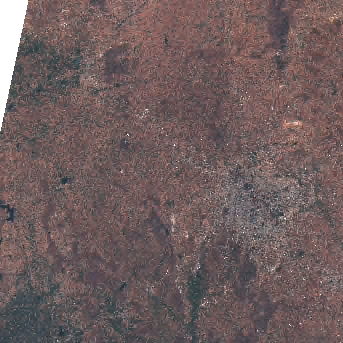

In [24]:
from IPython.display import Image
Image(items[0].asset("thumbnail")['href'])

# This code is for QGIS 

Run the below code in QGIS python console after installing the required libraries to get the cog directly in layer panel for the required aoi. Also get an active vector layer for aoi.

In [ ]:
# Import the sat-search library in OS4Geo terminal to use the code below in QGIS python console.
from satsearch import Search

#layer = iface.activeLayer()    # Uncomment this if there's an active layer
#feature = layer.getFeatures()
#for feat in feature:
 #  extend = feat.geometry().boundingBox()
#----------------------------------------------------------------------------------------------------
extent = iface.mapCanvas().extent()                          # Use this if aoi is in pan map view .
print([extent.xMinimum(), extent.yMinimum(), extent.xMaximum(), extent.yMaximum()])
bbox =[extent.xMinimum(), extent.yMinimum(), extent.xMaximum(), extent.yMaximum()]
#----------------------------------------------------------------------------------------------------
url = "https://earth-search.aws.element84.com/v0/"
scene_cloud_tolerance = 40 
date = '2022-02-12'
# Function searches for the appropriate COG
def image_search(bbox, date_range, scene_cloud_tolerance):
    """
    Using SatSearch find all Sentinel-2 images
    that meet the searching criteria
    """
    
    search = Search(
        bbox=bbox,
        datetime=date_range,
        query={
            "eo:cloud_cover": {"lt": scene_cloud_tolerance}
        },  
        collections=["sentinel-s2-l2a-cogs"],
        url=url,
    )

    return search.items()
items = image_search(bbox, date_range, scene_cloud_tolerance)
print('%s items' % len(items))                      
print(items.summary(['date', 'id', 'eo:cloud_cover'])) 
file_url = items[0].asset('green')['href']     # Item index and Asset can be changed as per requirement.
# Adds the layer directly in QGIS as COG
rlayer = iface.addRasterLayer(file_url, 'COG')